In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )


The current size of our dataset is : 
X_train ->  (60000, 28, 28) 
y_train ->  (60000,) 
X_test ->  (10000, 28, 28) 
y_test (10000,)


In [ ]:
print('X_train shape before : ',X_train.shape)
print('X_test shape before : ',X_test.shape)
# we convert the data to 2D(numsample , image_dimension) 
#with our images present as 1D vectors
X_train = X_train.reshape(len(X_train),-1) 
X_test = X_test.reshape(len(X_test),-1)
print('X_train shape after : ',X_train.shape)
print('X_test shape after : ',X_test.shape)
'''
we are reshaping the original (60000, 28, 28) 
array (60000 images, each of size 28x28) 
into a 2D array of shape (60000, 784)
'''
# we scale our features using normalization

X_train = X_train/255 
X_test = X_test/255 

X_train shape before :  (60000, 28, 28)
X_test shape before :  (10000, 28, 28)
X_train shape after :  (60000, 784)
X_test shape after :  (10000, 784)


In [ ]:
arr = [3,2,1,4] # output should be 
# 2 -> [1] 
# 1 -> [2]
# 0 -> [3]
# 3 -> [4]
print(arr)
indices = np.argsort(arr)
print(indices)
sorted_arr = [arr[i] for i in indices]
sorted_arr

[3, 2, 1, 4]
[2 1 0 3]


[1, 2, 3, 4]

In [ ]:
k = 3

def eucledean_dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def most_voted(k_nearest):
    nearest = max((k_nearest),key = k_nearest.count)
    return nearest

def knn(X_train,X_test,y_train,k):
    y_pred = []

    for test_samples in X_test:
        distances = []
        for train_samples in X_train:
            dist = eucledean_dist(test_samples,train_samples)
            distances.append(dist)
        # now we take the indices of the nearest k values after they are sorted
        indices = np.argsort(distances)[:k] 
        
        k_nearest = [y_train[i] for i in indices] 
        nearest = most_voted(k_nearest)
        y_pred.append(nearest)

    return np.array(y_pred)


In [ ]:
# org X_train is taking a lot of time so i am shortening the size
X_test_small,y_test_small = X_test[:1000],y_test[:1000]
X_train_small,y_train_small = X_train[:1000],y_train[:1000]
y_pred = knn(X_train_small,X_test_small,y_train_small,k=5)

In [ ]:
accuracy = np.sum(y_pred == y_test_small)/ len(y_test_small)
# i am printing less labels for better view
print(f"Predicted labels: {y_pred[:50]}")
print(f"Actual labels:    {y_test_small[:50]}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Predicted labels: [7 2 1 0 4 1 9 9 4 7 0 6 9 0 1 3 9 7 3 9 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 1 5 5 1 4 4 4]
Actual labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
Accuracy: 82.30%


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test[:1000], y_pred, output_dict=True)
    
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

{'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'Model': knn.__class__.__name__}

{'Accuracy': np.float64(0.823),
 'Precision': 0.8359574809089818,
 'Recall': 0.823,
 'F1-Score': 0.820416711862076,
 'Model': 'function'}

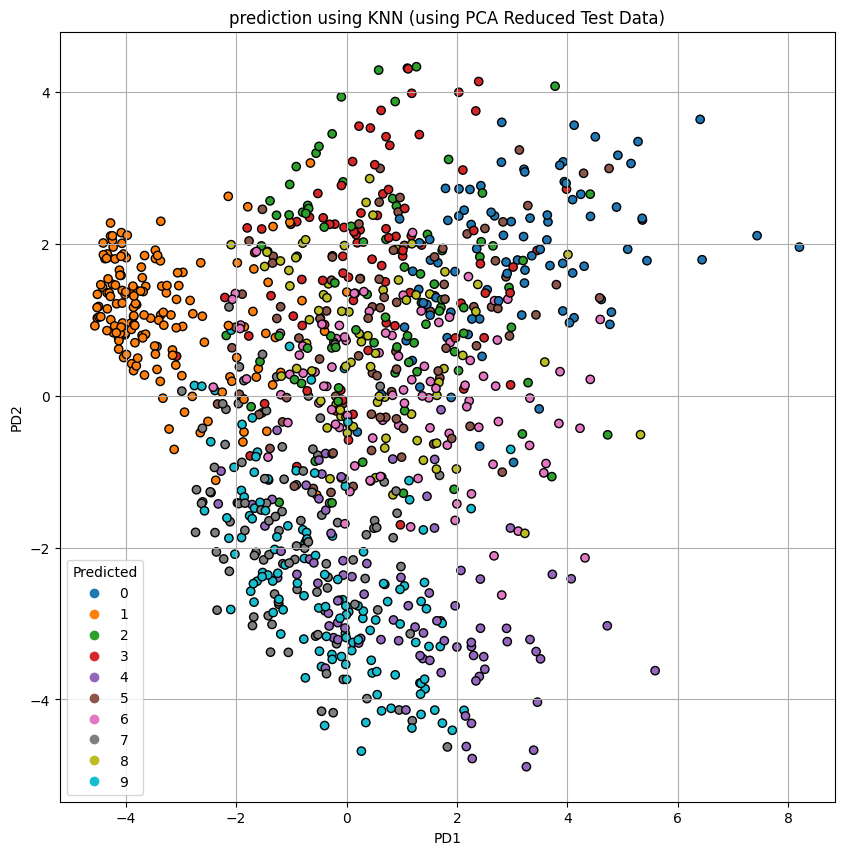

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test_small,y_test_small)
plt.figure(figsize=(10,10))
scatter = plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y_pred,cmap='tab10',edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Predicted")
plt.title("prediction using KNN (using PCA Reduced Test Data)")
plt.xlabel("PD1")
plt.ylabel("PD2")
plt.grid(True)
plt.show()



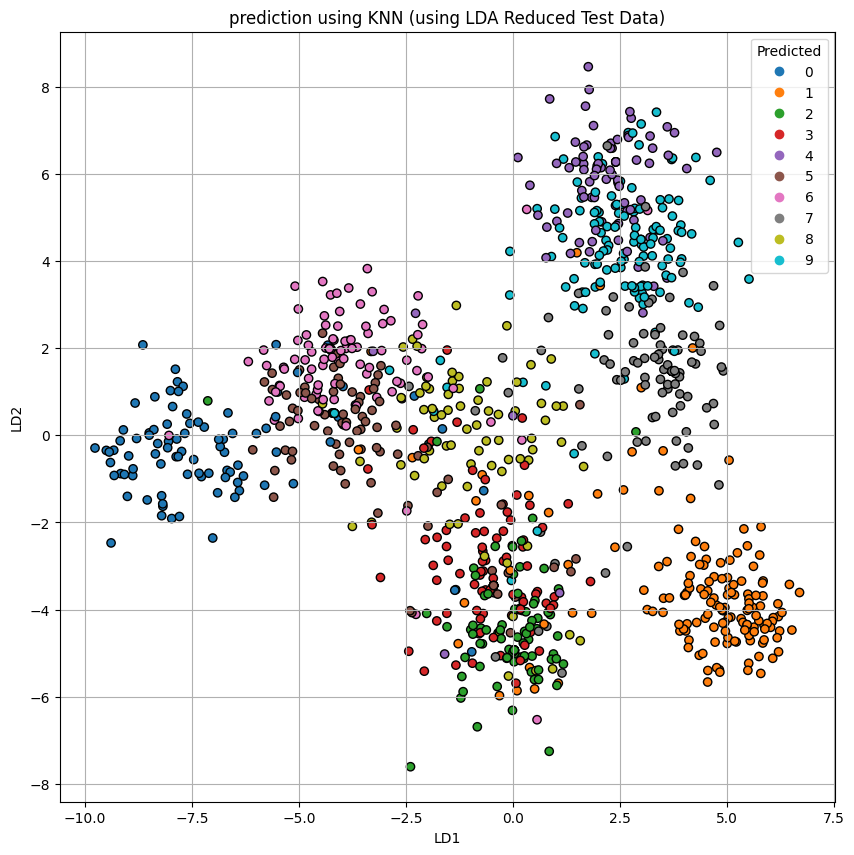

'\nwe see that why the accuracy is only around 82.30%. \nA lot of the digits are overlapping (3,5,8,2) , (4,9), \nand other overlaps as well\nso KNN gets confused in those crowded areas. \nSome classes clear, but others are just too mixed up \nfor KNN to handle to classify.\n'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_reduced = lda.fit_transform(X_test_small, y_test_small)
'''
Here, we reduced the test data (X_test_small) into 2D using LDA, 
which tries to separate classes based on the true labels (y_test_small).
Then we visualized the predicted labels (y_pred) using colors.
If the same-colored points cluster together, it means the model is 
doing a decent job.
However, we notice overlaps (like between 3,8,2,6), which 
likely confused the model, leading to lower accuracy.
'''
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted")
plt.title("prediction using KNN (using LDA Reduced Test Data)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.show()

'''
we see that why the accuracy is only around 82.30%. 
A lot of the digits are overlapping (3,5,8,2) , (4,9), 
and other overlaps as well
so KNN gets confused in those crowded areas. 
Some classes clear, but others are just too mixed up 
for KNN to handle to classify.
'''


C:\Users\anshb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


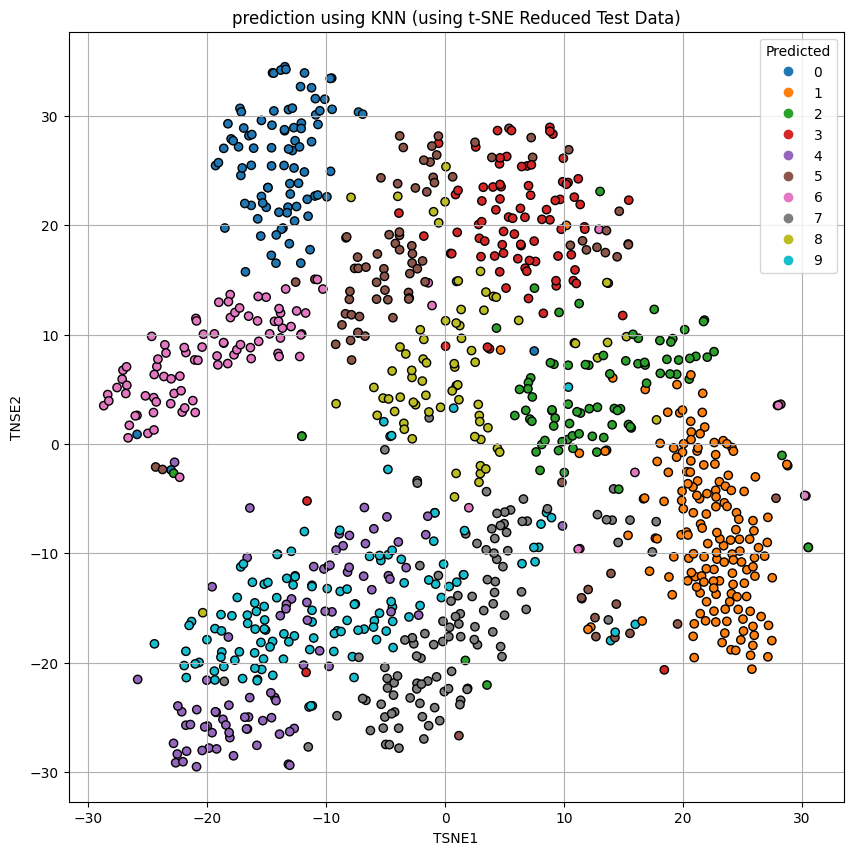

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=50,n_iter=1000)
X_reduced = tsne.fit_transform(X_test_small,y_test_small)
plt.figure(figsize=(10,10))
scatter = plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y_pred,cmap='tab10',edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Predicted")
plt.title("prediction using KNN (using t-SNE Reduced Test Data)")
plt.xlabel("TSNE1")
plt.ylabel("TNSE2")
plt.grid(True)
plt.show()

